# 实验指导

实验目的：

1. 掌握神经网络的基本原理；
2. 掌握word2vec的基本原理；
3. 掌握Keras的基本用法；
4. 掌握tensorflow的基本用法；
5. 掌握RNN的基本原理；
6. 观察熟悉RNN的两种常见变体(LSTM和GRU)的原理和用法；
7. 熟悉深度学习自然语言处理的基本流程。 

### I 实验描述：

#### 数据： 使用爬虫获得的豆瓣评论数据
#### 目标： 建立机器学习模型，能够对输入的句子自动判断其对应的分值或感情倾向

## II 数据预处理

目的： 将文本信息变成神经网络可以处理的数据格式； 

## 第一部分： 基础理论

## III 神经网络的基本原理

#### Q1: 神经网络的Loss函数的作用为何？

回答： 

衡量神经网络预测值和真实值之间的误差，作为优化的目标函数，计算出来的误差值是反向传播的依据。

#### Q2: 神经网络的激活函数(activation function)起什么作用？ 如果没有激活函数会怎么样？ 

回答：

1. 激活函数对输入数据进行了非线性变换。

2. 若没有激活函数会导致模型过于简单，无法拟合非线性数据的复杂情况。

#### Q3: 神经网络的softmax如何理解， 其作用是什么？ 在`答案`中写出softmax的python表达；


答案：

softmax函数把神经网络输出的logits转化为总和为1的概率分布。

```python
import numpy as np
logits = np.array([y1,y2,y3])
softmax = np.exp(logits)/np.sum(np.exp(logits))
```

#### Q4: 简述 normalized_1 和softmax函数的相同点和不同点， 说明softmax相比normalized_1该函数的优势所在
```python
output = np.array([y1, y2, y3])

normalized_1 = output / np.sum(output)
```

回答：

相同点：normalized_1和softmax函数都是数据归一化的方式。

不同点：softmax在标准化之前对数据进行了指数转换。

softmax的优势：可以处理output中同时存在正负数的情况，数据间评分的概率分布不会在计算时抵消。

#### Q5: 写出crossentropy的函数表达式，说明该函数的作用和意义

回答：

cross_entropy $:= -\sum_{c=1}^{C}y_{c}\log{\hat{y}_{c}}$

在分类问题中对比预测值和真实值衡量它们之间的误差。


### IV 掌握word2vec的基本用法

#### Q6: 说明word2vec要解决的问题背景， 以及word2vec的基本思路， 说明word2vec比起之前方法的优势；

回答：

问题背景：
1. 对于简单的方法，词向量化质量低，没有很好地保持不同词语之间的语义关系。
2. 过于复杂的方法，当需要向量化的词汇太多时计算量过大，效率低。

基本思路：
1. 对比不同模型**NNLM**,**RNNLM**的计算复杂度，非线性隐藏层构成了主要的计算复杂度，需要提出一个更有效率的模型。
2. Log-linear models:**CBOW**和**Skip-gram**,两个模型的网络结构都相同，都是一层隐藏层作线性投影后再用log-linear输出分类结果,不同的是**CBOW**是用前后内容预测当前词，而**Skip-gram**是用当前词预测围绕再其附近的词。

优势：
1. 减少了计算复杂度的同时，提高了模型准确率。
2. 更进一步地，训练出来的词向量能以简单代数运算的方式表达词义，例如Paris - France + Italy = Rome


#### Q7: 说明word2vec的预测目标， predication target, 在答案中写出skip-gram和cbow的预测概率；

回答： 
1.  skip-gram, $\hat{y}= \{P(w_{t-i}|w_t),P(w_{t-i+1}|w_t),\cdots P(w_{t-1}|w_t),P(w_{t+1}|w_t) \cdots ,P(w_{t+i}|w_t)\}$
2.  cbow, $\hat{y} = P(w_t|w_{t-i},w_{t-i+1},\cdots w_{t-1},w_{t-1}\cdots,w_{t+i})$

$i$ is window size

hints: 你可能需要查询latex的基本写法

#### Q8: 请说明word2vec的两种常见优化方法，分别阐述其原理；

回答：


1. Hierachical softmax. 将原本要预测的词汇集合$V$转化为binary tree的搜索路径，每一个词都对应着一条唯一的路径，预测词出现的概率就相当于预测这条路径出现的概率。这样作当更新参数时，复杂度从原来的$O(V)$减少到了$O(\log{V})$，大大较少了计算复杂度。

2.Negative sampling. 由于需要更新的参数太多，在进行优化时仅仅更新正类和抽样地更新某些负类有关的参数，其中更新的负类可以是随机抽样的，也可以是根据词频调整的函数分布抽样。

#### Q9: 请说明word2vec中哈夫曼树的作用；

回答：

word2vec使用hierachical softmax进行优化时，需要把预测的词汇转化为binary tree，这个时候通常会采用huffman binary tree。在构造huffman binary tree时，出现频率越高的词汇约接近根节点，而出现频率越低的词汇越接近叶节点，并且保证每个父节点都有两个子节点。在计算结果和优化word2vec时需要遍历从根节点到每个子节点的唯一路径，而只有很少的情况下会达到深层的叶子节点，所以huffman binary tree提高了模型的运算效率。

#### Q10: 在gensim中如何实现词向量？ 请将gensim中实现词向量的代码置于`答案`中

回答：
```python
from gensim.models import Word2Vec

sentence =['some sentences']

model = Word2Vec(sentences, min_count=1)

```

#### Q11: 请说出除了 skip-gram和cbow的其他4中词向量方法的名字， 并且选取其中两个叙述其基本原理。

回答：
ont-hot,count vector,co-occurrence vector,tf-idf

co-occurence vector:
在由两个词在窗口范围内共同出现次数构成的矩阵，通过svd变换后求得的词向量。

tf-idf: term frequency-inverse document frequency

$TF_i = \frac{c_{i}}{C_d} $ 词i出现在文档中的频率

$IDF_i = \log({\frac{N}{c_{i \in d}}} )$ 总文档/词i出现的文档数

$TF-IDF_i = TF_i * IDF_i$ 

### V 掌握keras的基本用法

#### Q12. 参考keras参考手册，构建一个机器学习模型，该模型能够完成使用DNN(deep neural networks) 实现MNIST数据集的分类；

回答：代码请置于下方：

hints:  keras 序列模型构建 https://keras.io/getting-started/sequential-model-guide/ 

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop
import numpy as np

In [2]:
batch_size = 128
num_classes = 10
epochs = 20

In [9]:
f=np.load('/Users/mozhiwen/.keras/datasets/mnist/mnist.npz')

In [36]:
x_train,y_train,x_test,y_test = f['x_train'],f['y_train'],f['x_test'],f['y_test']

In [17]:
img_size = 28

In [40]:
def reformat(dataset,labels):
    dataset = dataset.reshape(-1,img_size*img_size).astype('float32')
    dataset = (dataset-np.min(dataset))/(np.max(dataset)-np.min(dataset))
    labels = keras.utils.to_categorical(labels[:,None], num_classes)
    return dataset,labels

In [41]:
x_train,y_train = reformat(x_train,y_train)
x_test,y_test = reformat(x_test,y_test)
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')

60000 train samples
10000 test samples


In [27]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(img_size*img_size,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes,activation='softmax'))

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(),
              metrics = ['accuracy'])

In [45]:
history = model.fit(x_train,y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 171us/step - loss: 0.2471 - acc: 0.9237 - val_loss: 0.1005 - val_acc: 0.9687
Epoch 2/20
60000/60000 [==============================] - 9s 148us/step - loss: 0.1046 - acc: 0.9691 - val_loss: 0.0744 - val_acc: 0.9763
Epoch 3/20
60000/60000 [==============================] - 9s 152us/step - loss: 0.0769 - acc: 0.9770 - val_loss: 0.0753 - val_acc: 0.9768
Epoch 4/20
60000/60000 [==============================] - 9s 153us/step - loss: 0.0607 - acc: 0.9817 - val_loss: 0.0773 - val_acc: 0.9802
Epoch 5/20
60000/60000 [==============================] - 9s 149us/step - loss: 0.0512 - acc: 0.9846 - val_loss: 0.0796 - val_acc: 0.9789
Epoch 6/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.0433 - acc: 0.9871 - val_loss: 0.0694 - val_acc: 0.9827
Epoch 7/20
60000/60000 [==============================] - 10s 162us/step - loss: 0.0398 - acc: 0.9889 - val_loss: 0.0777 

In [46]:
score = model.evaluate(x_test,y_test,verbose=0)

In [47]:
print('Test loss:',score[0])
print('Test accuracy:',score[1])

Test loss: 0.0973729898917102
Test accuracy: 0.9842


### VI 掌握tensorflow的基本用法

#### Q13: 参考tensorflow的参考手册，构建一个机器学习模型，该模型能够完成使用DNN(deep neural networks)实现MNIST数据集的分类；

回答：代码请置于下方：

hints:tensorflow实现MNIST https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/udacity/2_fullyconnected.ipynb

In [71]:
import tensorflow as tf

In [74]:
graph = tf.Graph()
with graph.as_default():
    #input
    train_data = tf.placeholder(tf.float32,shape=(None,img_size*img_size))
    train_labels = tf.placeholder(tf.float32,shape=(None,num_classes))
    keep_prob = tf.placeholder(tf.float32)
    test_data = tf.constant(x_test)
    test_labels = tf.constant(y_test)
    
    #variables
    w1 = tf.Variable(tf.truncated_normal([img_size * img_size, 512]))
    b1 = tf.Variable(tf.zeros([512]))
    w2 = tf.Variable(tf.truncated_normal([512, 512]))
    b2 = tf.Variable(tf.zeros([512]))
    w3 = tf.Variable(tf.truncated_normal([512, num_classes]))
    b3 = tf.Variable(tf.zeros([num_classes]))
    
    #model
    layer1 = tf.nn.relu(train_data@w1+b1)
    drop_layer1 = tf.nn.dropout(layer1,keep_prob=keep_prob)
    layer2 = tf.nn.relu(drop_layer1@w2+b2)
    drop_layer2 = tf.nn.dropout(layer2,keep_prob=keep_prob)
    logits = drop_layer2@w3+b3
    loss = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(labels=train_labels,logits=logits))
    
    optimizer = tf.train.RMSPropOptimizer(0.001,decay=0.0).minimize(loss)
    
    train_prediction = tf.nn.softmax(logits)
    
    test_out1 = tf.nn.relu(test_data@w1+b1)
    test_out2 = tf.nn.relu(test_out1@w2+b2)
    test_logits = test_out2@w3+b3
    test_loss = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(labels=test_labels,logits=test_logits))
    test_prediction = tf.nn.softmax(test_logits)

In [75]:
def get_batches(dataset,labels,batch_size):
    batch_num = dataset.shape[0] // batch_size
    sample_num = batch_size * batch_num
    for i in range(batch_num):
        x = dataset[i*batch_size:(i+1)*batch_size,:]
        y = labels[i*batch_size:(i+1)*batch_size,:]
        yield x,y

In [76]:
def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

In [77]:
with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()
    step = 0
    for i in range(epochs):
        for x,y in get_batches(x_train,y_train,batch_size):
            feed_dict = {train_data:x,train_labels:y,keep_prob:0.8}
            _,l,predictions = session.run([optimizer,loss,train_prediction],
                                                feed_dict=feed_dict)
        print('epoch %d loss: %f accuracy %.1f%%' % (i,l,accuracy(predictions, y)))
        
    print('Test loss: %f accuracy %.1f%%' % (test_loss.eval(),accuracy(test_prediction.eval(), y_test)))
            

epoch 0 loss: 58.746006 accuracy 90.6%
epoch 1 loss: 21.229315 accuracy 93.0%
epoch 2 loss: 25.321468 accuracy 92.2%
epoch 3 loss: 22.862274 accuracy 93.8%
epoch 4 loss: 11.274590 accuracy 94.5%
epoch 5 loss: 7.947142 accuracy 96.9%
epoch 6 loss: 2.745044 accuracy 97.7%
epoch 7 loss: 10.025577 accuracy 96.9%
epoch 8 loss: 1.138198 accuracy 97.7%
epoch 9 loss: 7.077971 accuracy 97.7%
epoch 10 loss: 4.300566 accuracy 96.9%
epoch 11 loss: 0.718770 accuracy 98.4%
epoch 12 loss: 3.604064 accuracy 97.7%
epoch 13 loss: 6.006754 accuracy 96.9%
epoch 14 loss: 3.026232 accuracy 96.9%
epoch 15 loss: 2.748903 accuracy 98.4%
epoch 16 loss: 2.132647 accuracy 98.4%
epoch 17 loss: 2.855407 accuracy 96.1%
epoch 18 loss: 4.587665 accuracy 96.9%
epoch 19 loss: 1.937775 accuracy 96.9%
Test loss: 5.906247 accuracy 96.0%


#### Q14: 参考keras和tensorflow对同一问题的实现，说明keras和tensorflow的异同；

回答：Q12,Q12分别用keras和tensorflow实现了dnn识别mnist数据集。相同点是都需要自己定义模型的输入输出，损失函数和优化器。不同点是相比起tensorflow，keras提供了许多常用的api，实现起来代码量少，代码实现的模型简洁易懂，比较简便省事，不需要对模型和编程有深入的了解也能使用。而tensrflow相比起来更加强大，提供了很多在keras下无法掌控的个性化的参数设置，实现同一个任务代码量比较多，使用要求对模型和框架理解比较深入。

#### Q15: Q12， Q13 的tensorflow 或 keras 模型的训练时准确率和测试集准确率分别是多少？
回答：
tensorflow：训练准确率：96.9% 测试准确率：96.0%
keras：训练准确率：97.4% 测试准确率：98.4%

#### Q16: 训练时准确率大于测试集准确率的现象叫什么名字，在神经网络中如何解决该问题？
回答：过拟合。使用early stopping,l2-regularization,drop out。

#### Q17: 请使用自己的语言简述通过正则化 (regularization)减小过拟合的原理；
回答：

1. early stopping是在训练时观察training set 和 validation set的表现当validation set的表现无明显提升时停止训练。

2. l2-regularizarion,改写loss function为 $loss = f_{loss}+\lambda\lVert \omega \rVert_{2}^{2} $ 其中$f_{loss}$是未加上正则项之前的loss function，$\lambda\lVert \omega \rVert_{2}^{2}$是正则项，$\omega$是模型参数。加上了正则项的训练函数，在训练会权衡误差的下降和参数增加对loss fuction的影响，在下降误差的同时尽量使模型参数变得稀疏，避免过拟合。

3. 训练阶段，在深度学习模型层与层的输出和输入之间按比例随机切断一些链接。

#### Q18: 在tensorflow官方实例中给出的fully connected 神经网络的分类模型中，数据进行了哪些预处理，这些预处理的原因是什么？ 
回答：对数据进行了标准化，标准化后的数据不受features单位影响，训练时收敛得比较快。

### VII 掌握RNN的基本原理

#### Q19: 简述RNN解决的问题所具有的特点；
回答：RNN解决问题的特点是，处理的输入或输出数据都是时间或者序列相关，不同时间位置的数据可能相互关联相互影响。

#### Q20: 写出RNN实现时间或者序列相关的数学实现(见课程slides)；
回答：

Elman network:

$h_t = \sigma_{h}({W_hx_t+U_hh_{t-1}+b_h})$

$y_t = \sigma_y(W_yh_t+b_y)$

Jordan network:

$h_t = \sigma_h(W_hx_t+U_hy_{t-1}+b_h)$

$y_t = \sigma_y(W_yh_t+b_y)$

#### Q20: 简述RNN的两种重要变体的提出原因和基本原理？
回答：

提出原因：

在输入长序列训练RNN时，需要展开计算多次使得RNN变成一个很深层的网络，所以非常容易出现梯度消失或梯度爆炸的问题，而且模型的计算和训练会非常缓慢。另一方面，RNN处理长序列时会丧失长期记忆的能力，序列中较前的输入会逐渐被遗忘，这对模型的效果会造成很大的影响。

基本原理:

LSTM:

- 最主要的一层是$g_t$,这层和基础RNN cell基本相同，都是用过$x_t$和$h_{t-1}$得出结果。
在此基础上还有三种gate contrillers，用sigmoid函数输出0-1的结果来控制输入输出。
- forget gate 控制长期记忆中的哪些部分需要舍弃
- input gate 控制 $g_t$中的哪些部分需要加到长期记忆中
- output gate 控制更新后的长期记忆哪一部分输出到$h_t$,$y_t$中

GRU:

- GRU是LSTM的精简版，它把长短期记忆都融合成一个状态$h_t$
- 由一个controller同时控制forget gate和input gate
- 没有output gate 状态会根据序列时间改变


#### Q21: Attentional RNN 以及 Stacked RNN 和 Bi-RNN 分别是什么，其做了什么改动？
回答：

Attentional RNN:  

在计算输出值时的在考虑原有输入的同时，加入了context vector $s_{i-1} = f(s_{i-1},y_{i-1},c_i)$,其中$c_i$是源输入的$h_t$的加权平均$c_i = \sum_{j=1}^{T_x}\alpha_{ij}h_j$,而$\alpha_{ij} = softmax(e_{ij})$, $e_{ij} = a(s_{i-1},h_j)$,其中a是一个全链接神经网络。这样做可以建立在计算输出时，建立与源输入的联系，并且专注与这一时刻有用的信息。  

Stacked RNN:

可以理解为RNN cell的堆叠，t时刻的的输出不仅仅是t+1时刻的输入，同时候也是下一层RNN cell的输入，这样可以根据需要增加网络深度。  

Bi-RNN:

在原有RNN的基础上，计算从后往前的RNN cell，t时刻的预测值就包含了输入序列的前后信息。t时刻的预测可表示为$\hat{y_t} = \sigma_y(w_y[\overrightarrow{h_t},\overleftarrow{h_t}]+b_y)$

## 第二部分： 实验过程

### IIX 数据预处理

#### Q22：要实现文本分类或情感分类，文本信息需要进行哪些初始化操作？自己手工实现，keras提供的API，tenorflow提供的API，分别是哪些？请提供关键代码置于下边`回答`中

回答：

1. 简述所需要的初始化操作：  
    + 切分词，可根据需要去掉停用词或标点符号
    + 构造word-id，id-word的hash表
    + 用构造的hash表把句子转化成整数序列
    + 准备好预训练的embedding(optional)
    + 构造batch函数决定如何输入训练数据  
    
切分词使用jieba分词

keras提供的api：
+ keras.preprocessing.text 提供Tokenizer类可以文本构造需要的hash表并把句子转化为整数序列
+ keras.preprocessing.sequence 提供pad_sequence函数为序列提供padding
+ mini-batch：keras在训练时只需要指定batch size即可，也可以根据自己的需要写一个generator输入训练数据

tensorflow提供的api： 
+ tensorflow 集成了keras的api，对于文本处理大同小异
+ 训练时需要自定义batch函数，一般是写一个generator生成需要的训练数据


2. 自己手工实现的id_to_word, word_to_id, padding, batched等操作如何实现？
    + id_to_word, word_to_id
    
    ```python
        word_count = Counter()
    for s in movie_comments['word_sequence']:
        for w in s.split():
            word_count[w] += 1

    id_to_word = {}
    id_to_word[0] = '<PAD>'
    for i,w in enumerate(word_count,1):id_to_word[i] = w

    word_to_id = {w:i for i,w in id_to_word.items()}```
    + padding
    
    ```python
    def pad_sequence(word_sequence,maxlength):
    
        pad_sequence = np.zeros((len(word_sequence),maxlength),dtype=np.int32)
        for ri,row in enumerate(word_sequence):
            for ci,w in enumerate(row.split()[:maxlength]):
                pad_sequence[ri,ci] = word_to_id[w]
        return pad_sequence
        
    sequence = pad_sequence(movie_comments['word_sequence'],200)
    ```
    
    + batched
    
    ```python
    star = movie_comments['star'].values
    star = star.astype(np.int32)
    sub_one = np.vectorize(lambda x:x-1)
    star = sub_one(star)

    onehot_star = np.eye(5)[star]

    def get_sequence_batches(datasets,labels,batch_size):
        assert datasets.shape[0] == labels.shape[0]
        batch_num = datasets.shape[0] // batch_size
        datasets_cut = datasets[:batch_num*batch_size,:]
        last_datasets = datasets[batch_num*batch_size:,:]
        labels_cut = labels[:batch_num*batch_size,:]
        last_labels = labels[batch_num*batch_size:,:]
    
    for i in range(batch_num+1):
        if i == batch_num:
            yield last_datasets,last_labels
            break
        x = datasets_cut[i*batch_size:(i+1)*batch_size,:]
        y = labels_cut[i*batch_size:(i+1)*batch_size,:]
        yield x,y
    ```

hints: 

+ 参考1 https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py
+ 参考2 

---

## code for sentimental analysis(preprocessing)


In [1]:
import pandas as pd
import jieba
from opencc import OpenCC
import re
from collections import Counter
import numpy as np
import pickle

In [2]:
def remove_char(string):
    return re.sub('[a-zA-Z0-9]','',string)

In [3]:
def t2s(string):
    opencc = OpenCC('t2s')
    return opencc.convert(string)

### word to id,id to word

In [4]:
with open('./movie_comments_data.pkl','rb') as f:
    movie_comments = pickle.load(f)

In [5]:
word_count = Counter()
for s in movie_comments['word_sequence']:
    for w in s.split():
        word_count[w] += 1

In [6]:
word_count

Counter({'吴京': 279,
         '意淫': 281,
         '到': 10373,
         '了': 102381,
         '脑残': 319,
         '的': 328466,
         '地步': 197,
         '，': 353805,
         '看': 34250,
         '恶心': 943,
         '想': 7474,
         '吐': 574,
         '首映礼': 42,
         '。': 219514,
         '太': 13043,
         '恐怖': 599,
         '这个': 10282,
         '电影': 34614,
         '不讲道理': 8,
         '完全': 4152,
         '就是': 14015,
         '在': 31161,
         '实现': 270,
         '他': 10663,
         '小': 6649,
         '粉红': 39,
         '英雄': 1706,
         '梦': 885,
         '各种': 3143,
         '装备': 83,
         '轮番': 21,
         '上场': 17,
         '视': 29,
         '物理': 63,
         '逻辑': 1417,
         '于': 1783,
         '不顾': 57,
         '不得不': 670,
         '说': 11120,
         '有钱': 205,
         '真': 5188,
         '好': 23131,
         '随意': 170,
         '胡闹': 45,
         '炒作': 70,
         '水平': 819,
         '不输': 48,
         '冯小刚': 266,
         '但小刚': 1,
       

In [7]:
print('Total words',len(word_count))

vocab_size = 60000

Total words 125794


In [8]:
id_to_word = {}
id_to_word[0] = '<PAD>'

sort_word_fre = sorted(word_count,key=word_count.get,reverse=True)

for i,w in enumerate(sort_word_fre[:vocab_size],1):id_to_word[i] = w

In [9]:
word_to_id = {w:i for i,w in id_to_word.items()}

In [10]:
len(word_to_id)

60001

### padding

In [11]:
def pad_sequence(word_sequence,maxlength):
    pad_sequence = np.zeros((len(word_sequence),maxlength),dtype=np.int32)
    for ri,row in enumerate(word_sequence):
        for ci,w in enumerate(row.split()[:maxlength]):
            pad_sequence[ri,ci] = word_to_id.get(w,0)
    return pad_sequence

In [12]:
sequence = pad_sequence(movie_comments['word_sequence'],200)

### batches

In [13]:
star = movie_comments['star'].values
star = star.astype(np.int32)
sub_one = np.vectorize(lambda x:x-1)
star = sub_one(star)

In [14]:
u,c = np.unique(star,return_counts=True)

In [15]:
for s,n in zip(u,c):print(s,n/sum(c))

0 0.09393332160584947
1 0.10759711503896839
2 0.2511415175874016
3 0.3204968374035351
4 0.22683120836424545


In [16]:
onehot_star = np.eye(5,dtype=np.int32)[star]

In [17]:
def get_sequence_batches(datasets,labels,batch_size):
    assert datasets.shape[0] == labels.shape[0]
    batch_num = datasets.shape[0] // batch_size
    datasets_cut = datasets[:batch_num*batch_size,:]
    last_datasets = datasets[batch_num*batch_size:,:]
    labels_cut = labels[:batch_num*batch_size,:]
    last_labels = labels[batch_num*batch_size:,:]
    
    for i in range(batch_num+1):
        if i == batch_num:
            #yield last_datasets,last_labels
            break
        x = datasets_cut[i*batch_size:(i+1)*batch_size,:]
        y = labels_cut[i*batch_size:(i+1)*batch_size,:]
        yield x,y

In [18]:
del star

### IX 构建神经网络模型

#### Q22:在没有预训练的词向量时候， keras 如何实现embedding操作，即如何依据一个单词的序列获得其向量表示？
回答：
```python
max_feature = 200
embed_size =300
vocab_size = len(vocab_to_id)

from keras.models import Sequential
from keras.layers import Embedding

model = Sequential()
model.add(Embedding(vocab_size,embed_size))

```

#### Q23:在没有预训练的词向量时候， tensorflow 如何实现embedding操作，即如何依据一个单词的序列获得其向量表示？
回答：
```python
import tensorflow as tf

input_seq = tf.Placeholder(tf.int32,[None,max_feature])

embedding = tf.Variable(tf.random_uniform((vocab_size,embed_size),-1,1))

embed = tf.nn.embedding_lookup(embedding,input_seq)
```

#### Q24: 在有预先训练的词向量时候，keras和tensorflow又如何实现embeding操作

回答：
keras:
```python
pretrained_vec = ... # is a pretrained embedding numpy ndarray

import keras
from keras.models import Model,Sequential
from keras.layers import Input,Dense,Embedding

embeddings_initializer = keras.initializers.Constant(value=pretrained_vec)

inputs = Input(shape=(max_feature,))
embed_layer = Embedding(vocab_size,embed_size,embeddings_initializer=embeddings_initializer)(inputs)
embed_layer.trainable = False
```

tensorflow:
```python
pretrained_vec = ... # is a pretrained embedding numpy ndarray

import tensorflow as tf

input_seq = tf.Placeholder(tf.int32,[None,max_feature])

embedding = tf.get_variable(name="embedding", shape=pretrained_vec.shape, initializer=tf.constant_initializer(pretrained_vec), trainable=False)

embed = tf.nn.embedding_lookup(embedding,input_seq)
```

#### Q25： 基于上文进行的数据预处理，使用keras和tensorflow如何构建神经网络模型？请提供关键代码

回答： keras模型构建的关键代码：

回答：tensorflow模型构建的关键代码：

###  X 使用keras的history观察loss以及accuracy的变化

#### Q26: keras如何观察模型的loss变化以及准确率的变化，请列出关键代码

回答：
```python
history = sentiment_model.fit(train_x,train_y,batch_size=batch_size,
                             epochs=epochs,
                             validation_data=(val_x,val_y),
                             verbose=1)

print(history.history.keys())
```

#### Q27: 请使用matplotlib画出loss变化的趋势；

回答：

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

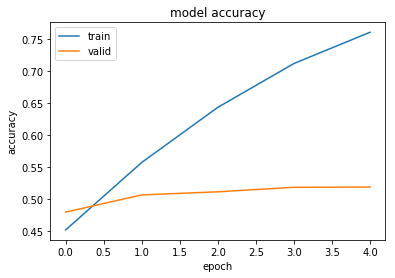

In [35]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

### XI 使用tensorflow tensorboard观察loss, accuracy的变化

#### Q28: tensorflow如何观察模型的loss变化以及准确率的变化， tensor board 如何使用？ 请列出关键代码

回答：

#### Q29: 试着点击tensor board的不同按钮 观察图像的变化； 试着给tensorflow board机制 写入不同时候训练的模型时候，给模型取不同的名字，观察tensor board的图像变化；

回答：

### XII 观察熟悉RNN的两种变体的原理和方法

#### Q30:试着改进RNN，使用LSTM， GRU 进行模型的改动， 观察训练结果(loss和accuracy)的变化， 你观察到了什么变化？ 如何解释？

回答：

---

## split the data

In [19]:
split_frac = 0.8

from sklearn.utils import shuffle

sequence,onehot_star = shuffle(sequence,onehot_star,random_state=42)

split_idx = int(len(sequence)*0.8)

train_x, val_x = sequence[:split_idx], sequence[split_idx:]
train_y, val_y = onehot_star[:split_idx], onehot_star[split_idx:]

test_idx = int(len(val_x)*0.5)

val_x, test_x = val_x[:test_idx], val_x[test_idx:]
val_y, test_y = val_y[:test_idx], val_y[test_idx:]

print('train_x shape:', train_x.shape)
print('val_x shape:', val_x.shape)
print('test_x shape:', test_x.shape)

train_x shape: (209195, 200)
val_x shape: (26149, 200)
test_x shape: (26150, 200)


## hyper params

In [20]:
max_feature = 200
embed_size = 300
lstm_size = 32
lstm_layers = 2
dropout_rate = 0.5
batch_size = 128
learning_rate = 0.001
epochs = 50

## load embeddings

In [21]:
pretrianed_wv = np.load('./pretrained_wv.npy')

print(word_not_in_pretrain)

print('word not in pretrained vocab: %.2f' % (count_not_in_pretrain/vocab_size))

## code for sentimental analysis(construct model keras)

In [36]:
import keras
from keras.layers import Input,Embedding,Dense,CuDNNLSTM,LSTM,Bidirectional,Lambda,dot,Activation,concatenate,Dropout,Masking
from keras.models import Model,Sequential
from keras.optimizers import adam
from keras.initializers import Constant
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras import backend as K

In [37]:
K.clear_session()

In [38]:
callbacks = [EarlyStopping(monitor='val_loss', min_delta=0.00005, patience=3, verbose=0,)]

In [39]:
def attention_3d_blocks(hidden_states,max_feature=200,attention_size=128):
    hidden_size = int(hidden_states.shape[2])
    score_first_part = Dense(hidden_size, use_bias=False, name='attention_score_vec')(hidden_states)
    h_t = Lambda(lambda x: x[:, -1, :], output_shape=(hidden_size,), name='last_hidden_state')(hidden_states)
    score = dot([score_first_part, h_t], [2, 1], name='attention_score')
    attention_weights = Activation('softmax', name='attention_weight')(score)
    context_vector = dot([hidden_states, attention_weights], [1, 1], name='context_vector')
    pre_activation = concatenate([context_vector, h_t], name='attention_output')
    attention_vector = Dense(attention_size, use_bias=False, activation='tanh',name='attention_vector')(pre_activation)

    return attention_vector

In [40]:
inputs = Input(shape=(max_feature,))


weights = Constant(value=pretrianed_wv)
embed_layer = Embedding(vocab_size+1,embed_size,embeddings_initializer=weights)
embed_layer.trainable = True

embed = embed_layer(inputs)
#embed = Masking(mask_value=pretrianed_wv[0])(embed)

biLSTM_layer1 = Bidirectional(CuDNNLSTM(lstm_size,return_sequences=True,kernel_regularizer=l2(0.002),recurrent_regularizer=l2(0.002)))(embed)
biLSTM_layer1 = Dropout(dropout_rate)(biLSTM_layer1)

biLSTM_layer2 = Bidirectional(CuDNNLSTM(lstm_size,return_sequences=True,kernel_regularizer=l2(0.002),recurrent_regularizer=l2(0.002)))(biLSTM_layer1)
biLSTM_layer2 = Dropout(dropout_rate)(biLSTM_layer2)


attention_mul = attention_3d_blocks(biLSTM_layer2)

out_ = Dense(5, activation='softmax')(attention_mul)

In [41]:
sentiment_model = Model(inputs=inputs,outputs=out_)
sentiment_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 200)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 200, 300)     18000300    input_1[0][0]                    
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 200, 64)      85504       embedding_1[0][0]                
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 200, 64)      0           bidirectional_1[0][0]            
__________________________________________________________________________________________________
bidirectio

In [28]:
opt = adam(lr=learning_rate)

In [29]:
sentiment_model.compile(loss='categorical_crossentropy',
                        optimizer=opt,
                        metrics=['accuracy'])

In [30]:
history = sentiment_model.fit(train_x,train_y,batch_size=batch_size,
                             epochs=epochs,
                              callbacks=callbacks,
                             validation_data=(val_x,val_y),
                             verbose=1)

Train on 209195 samples, validate on 26149 samples
Epoch 1/50
209195/209195 [==============================] - 1930s 9ms/step - loss: 1.3375 - acc: 0.4383 - val_loss: 1.2284 - val_acc: 0.4650
Epoch 2/50
209195/209195 [==============================] - 1928s 9ms/step - loss: 1.1549 - acc: 0.5077 - val_loss: 1.2117 - val_acc: 0.4825
Epoch 3/50
209195/209195 [==============================] - 1922s 9ms/step - loss: 1.0819 - acc: 0.5489 - val_loss: 1.2277 - val_acc: 0.4823
Epoch 4/50
 13184/209195 [>.............................] - ETA: 29:05 - loss: 0.9681 - acc: 0.6056

KeyboardInterrupt: 

In [31]:
score,acc = sentiment_model.evaluate(test_x,test_y,
                                    batch_size=batch_size)
print('Test score:', score)

print('Test accuracy', acc)

26150/26150 [==============================] - 13s 507us/step
Test score: 1.5843035610136977
Test accuracy 0.5173996175931015


In [32]:
sentiment_model.save_weights('./checkpoints/keras_biatten_w.h5')

## Text CNN model

In [37]:
from keras.layers import Input, Dense, concatenate, Activation
from keras.layers import *
from keras.models import Model

In [39]:
tcnn_inputs = Input(shape=(max_feature,))



weights = Constant(value=pretrianed_wv)
embed_layer = Embedding(vocab_size+1,embed_size,embeddings_initializer=weights)
embed_layer.trainable = True

embed = embed_layer(inputs)

bigram_branch = Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1)(embed)
bigram_branch = GlobalMaxPooling1D()(bigram_branch)
bigram_branch = Dropout(dropout_rate)(bigram_branch)

trigram_branch = Conv1D(filters=100, kernel_size=3, padding='valid', activation='relu', strides=1)(embed)
trigram_branch = GlobalMaxPooling1D()(trigram_branch)
trigram_branch = Dropout(dropout_rate)(trigram_branch)

fourgram_branch = Conv1D(filters=100, kernel_size=4, padding='valid', activation='relu', strides=1)(embed)
fourgram_branch = GlobalMaxPooling1D()(fourgram_branch)
fourgram_branch = Dropout(dropout_rate)(fourgram_branch)


merged = concatenate([bigram_branch, trigram_branch, fourgram_branch], axis=1)
merged = BatchNormalization()(merged)

merged = Dense(256, activation='relu')(merged)
merged = Dropout(0.2)(merged)
outmerge = Dense(5,activation='softmax')(merged)

In [39]:
tcnn_model = Model(inputs=tcnn_inputs,outputs=outmerge)
tcnn_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 200)          0                                            
__________________________________________________________________________________________________
masking_1 (Masking)             (None, 200)          0           input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 200, 300)     18000300    masking_1[0][0]                  
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 199, 100)     60100       embedding_1[0][0]                
__________________________________________________________________________________________________
conv1d_2 (

In [40]:
opt = adam(lr=learning_rate)

In [41]:
tcnn_model.compile(loss='categorical_crossentropy',
                        optimizer=opt,
                        metrics=['accuracy'])

In [ ]:
history_cnn = tcnn_model.fit(train_x,train_y,batch_size=batch_size,
                             epochs=epochs,
                              callbacks=callbacks,
                             validation_data=(val_x,val_y),
                             verbose=1)

Train on 209195 samples, validate on 26149 samples
Epoch 1/50
209195/209195 [==============================] - 325s 2ms/step - loss: 1.3430 - acc: 0.4000 - val_loss: 3.7954 - val_acc: 0.3342
Epoch 2/50
209195/209195 [==============================] - 321s 2ms/step - loss: 1.1804 - acc: 0.4793 - val_loss: 2.0329 - val_acc: 0.2767
Epoch 3/50
209195/209195 [==============================] - 321s 2ms/step - loss: 1.0769 - acc: 0.5368 - val_loss: 2.9755 - val_acc: 0.2974
Epoch 4/50
209195/209195 [==============================] - 318s 2ms/step - loss: 0.9732 - acc: 0.5922 - val_loss: 5.2486 - val_acc: 0.3677
Epoch 5/50
209195/209195 [==============================] - 318s 2ms/step - loss: 0.8755 - acc: 0.6411 - val_loss: 1.6451 - val_acc: 0.4565
Epoch 6/50
209195/209195 [==============================] - 318s 2ms/step - loss: 0.7936 - acc: 0.6786 - val_loss: 1.6011 - val_acc: 0.4692
Epoch 7/50
209195/209195 [==============================] - 318s 2ms/step - loss: 0.7216 - acc: 0.7098 - val_

In [38]:
score,acc = tcnn_model.evaluate(test_x,test_y,
                                    batch_size=batch_size)
print('Test score:', score)

print('Test accuracy', acc)

26150/26150 [==============================] - 4s 157us/step
Test score: 1.9522584938501537
Test accuracy 0.5313575525824016


In [39]:
tcnn_model.save_weights('./checkpoints/keras_tcnn_w.h5')

## code for sentimental analysis(construct model tensorflow)

In [157]:
import tensorflow as tf

In [158]:
tf.reset_default_graph()

In [159]:
keep_prob_rate = 0.8

### inputs

In [160]:
sentiment_graph = tf.Graph()

with sentiment_graph.as_default():
    inputs_ = tf.placeholder(tf.int32, [None,None], name='inputs')
    labels_ = tf.placeholder(tf.int32, [None,None], name='labels')
    keep_prob = tf.placeholder(tf.float32, name='keep_prob')

### embedding

In [161]:
with sentiment_graph.as_default():
    embedding = tf.get_variable(name='embedding',shape=pretrianed_wv.shape,
                                initializer=tf.constant_initializer(pretrianed_wv),
                               trainable=False)
    embed_ = tf.nn.embedding_lookup(embedding,inputs_)

### LSTM cell

In [162]:
with sentiment_graph.as_default():
    def build_cell(lstm_size,keep_prob):
        lstm = tf.contrib.rnn.BasicLSTMCell(lstm_size)
        drop = tf.contrib.rnn.DropoutWrapper(lstm, output_keep_prob=keep_prob)
        return drop
    
    cell = tf.contrib.rnn.MultiRNNCell([build_cell(lstm_size,keep_prob) for _ in range(lstm_layers)])
    
    initial_state = cell.zero_state(batch_size, tf.float32)
    
    outputs , final_state = tf.nn.dynamic_rnn(cell,embed_,
                                             initial_state=initial_state)

### output

In [163]:
with sentiment_graph.as_default():
    logits = tf.contrib.layers.fully_connected(outputs[:,-1],5,activation_fn=tf.sigmoid)
    
    predictions = tf.nn.softmax(logits)
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=labels_))
    
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

### validation accuracy

In [164]:
def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

In [165]:
with sentiment_graph.as_default():
    correct_pred = tf.equal(tf.argmax(predictions,1),tf.argmax(labels_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

### Training

In [166]:
with sentiment_graph.as_default():
    saver = tf.train.Saver()
    
with tf.Session(graph=sentiment_graph) as sess:
    tf.global_variables_initializer().run()
    iteration = 1
    for e in range(epochs):
        state =  sess.run(initial_state)
        
        for ii, (x, y) in enumerate(get_sequence_batches(train_x, train_y, batch_size),1):
            feed = {inputs_:x,
                   labels_:y,
                   keep_prob:0.8,
                   initial_state:state}
            loss, state, _, acc = sess.run([cost,final_state,optimizer,accuracy],feed_dict=feed)
            
            if iteration%5==0:
                print("Epoch: {}/{}".format(e, epochs),
                     "Iterarion:{}".format(iteration),
                     "Train loss: {:.3f}".format(loss),
                     "Accuracy:{:.4f}".format(acc))
                
            if iteration%25==0:
                val_loss = []
                val_acc = []
                val_state = sess.run(cell.zero_state(batch_size, tf.float32))
                for x,y in get_sequence_batches(val_x, val_y, batch_size):
                    feed = {inputs_:x,
                           labels_:y,
                           keep_prob:1.0,
                           initial_state:val_state}
                    batch_loss,val_state,batch_acc = sess.run([cost,final_state,accuracy],feed_dict=feed)
                    val_acc.append(batch_acc)
                    val_loss.append(batch_loss)
                    
                print("Val loss: {:.3f}".format(np.mean(val_loss)),
                     "Val acc: {:.4f}".format(np.mean(val_acc)))
            iteration +=1
    saver.save(sess, "checkpoints/sentiment.ckpt")

Epoch: 0/20 Iterarion:5 Train loss: 1.521 Accuracy:0.3340
Epoch: 0/20 Iterarion:10 Train loss: 1.520 Accuracy:0.2891
Epoch: 0/20 Iterarion:15 Train loss: 1.522 Accuracy:0.3164
Epoch: 0/20 Iterarion:20 Train loss: 1.508 Accuracy:0.3379
Epoch: 0/20 Iterarion:25 Train loss: 1.518 Accuracy:0.2871
Val loss: 0.323 Val acc: 0.3105
Epoch: 0/20 Iterarion:30 Train loss: 1.505 Accuracy:0.3477
Epoch: 0/20 Iterarion:35 Train loss: 1.497 Accuracy:0.3477
Epoch: 0/20 Iterarion:40 Train loss: 1.496 Accuracy:0.3203
Epoch: 0/20 Iterarion:45 Train loss: 1.512 Accuracy:0.3398
Epoch: 0/20 Iterarion:50 Train loss: 1.504 Accuracy:0.3262
Val loss: 0.323 Val acc: 0.3105
Epoch: 0/20 Iterarion:55 Train loss: 1.521 Accuracy:0.2969
Epoch: 0/20 Iterarion:60 Train loss: 1.515 Accuracy:0.3223
Epoch: 0/20 Iterarion:65 Train loss: 1.498 Accuracy:0.3457
Epoch: 0/20 Iterarion:70 Train loss: 1.536 Accuracy:0.2969
Epoch: 0/20 Iterarion:75 Train loss: 1.518 Accuracy:0.3008
Val loss: 0.323 Val acc: 0.3105
Epoch: 0/20 Iterario

KeyboardInterrupt: 

### Testing

In [ ]:
test_loss = []
test_acc= []
with tf.Session(graph=sentiment_graph) as sess:
    saver.restore(sess,tf.train.latest_checkpoint('checkpoints'))
    test_state = sess.run(cell.zero_state(batch_size,tf.float32))
    for ii, (x, y) in enumerate(get_sequence_batches(test_x, test_y, batch_size),1):
        feed = {inputs_:x,
               labels_:y,
               keep_prob:1,
               initial_state:test_state}
        
        batch_loss,test_state,batch_acc = sess.run([cost,final_state,accuracy],feed_dict=feed)
        
        test_loss.append(batch_loss)
        test_acc.append(batch_acc)
        
    print("Test loss: {:.3f}".format(np.mean(test_loss)),
         "Test accuracy {:.4f}".format(np.mean(test_acc)))

### XIII 模型的改进

#### Q31: 修改vocabulary size, embedding size, 并且结合使用LSTM， GRU， Bi-RNN， Stacked， Attentional, regularization, 等各种方法组合进行模型的优化， 至少进行10次优化，每次优化请按照以下步骤填写：

回答：

---这是一个实例----

第1次优化：

1. 存在的问题： loss下降太慢；
2. 准备进行的优化：减小模型的神经单元数量；
3. 期待的结果：loss下降加快；
4. 实际结果：loss下降的确加快(或者并没有加快)
5. 原因分析：模型神经元数量减小，收敛需要的次数减少，loss下降加快


---你的实验优化结构记录在此---

**第1次优化**：

1. 存在的问题： loss几乎不下降
2. 准备进行的优化：learning rate batch size 增大，LSTM换为bidirectional-lstm
3. 期待的结果：loss下降加快
4. 实际结果：loss下降的确加快
5. 原因分析：模型复杂度不够 欠拟合

**第2次优化**：

1. 存在的问题： loss开始下降，但是acc到0.5开始出现瓶颈
2. 准备进行的优化：尝试加入attention机制，减少lstm size
3. 期待的结果：loss下降加快，模型效果提升突破瓶颈
4. 实际结果：loss下降并没有加快
5. 原因分析：翻阅资料检查代码后，理解错公式发现实现的attention机制与论文有出入，计算score时的参数矩阵$W$,shape应该是(hidden_size,hidden_size)而不是(time_step,time_step)

**第3次优化**：

1. 存在的问题： 自己用keras实现的attention机制有问题（如第2次优化描述）
2. 准备进行的优化：更改代码实现正确的attention机制
3. 期待的结果：loss下降加快，模型效果提升突破瓶颈
4. 实际结果：loss下降加快，模型效果提升突破瓶颈
5. 原因分析：attention机制使模型更加专注于有用的信息进行预测，所以模型的效果更好

**第4次优化**：

1. 存在的问题： 模型在10 epochs后过拟合，train loss一直下降，但是valid loss不下降
2. 准备进行的优化：在lstm加上0.2的drop out，keras模型拟合时加入early stopping机制，当val loss不下降时停止训练
3. 期待的结果：train loss 和 valid loss 同步下降差距缩小
4. 实际结果：确实缓解了过拟合的情况，但是loss下降得太慢，训练被early stopping机制停止
5. 原因分析：单层的biLSTM模型还是不够复杂 模型还是欠拟合

**第5次优化**：

1. 存在的问题： 模型欠拟合，在接近10 epochs时loss不下降
2. 准备进行的优化：增加模型深度，改为stacked 2 layer biLSTM
3. 期待的结果：loss突破瓶颈继续下降而且避免过拟合
4. 实际结果：loss并没有突破，还是有过拟合的情况
5. 原因分析：模型过拟合

**第6次优化**：

1. 存在的问题： 模型过拟合，loss下降慢
2. 准备进行的优化：增大drop out rate，减少lstm size,使用batchnorm
3. 期待的结果：train loss 和 valid loss 同步下降差距缩小，acc能提高于0.5
4. 实际结果：模型过拟合非常严重，loss也没有比之前下降很多
5. 原因分析：加入batchnorm后模型太复杂

**第7次优化**：

1. 存在的问题： 模型过拟合 acc无法突破0.5
2. 准备进行的优化：把原先的词向量参数trainable设置为True，也参与训练，同时调整batch size为32
3. 期待的结果：解决过拟合问题 acc突破0.5
4. 实际结果：仍然有严重的过拟合问题，但是acc突破了0.5
5. 原因分析：模型已经足够复杂，要减少参数和运用正则化技巧

**第9次优化**：

1. 存在的问题： 模型过拟合严重
2. 准备进行的优化：在bilstm层加上l2正则化
3. 期待的结果：
4. 实际结果：
5. 原因分析：

**第10次优化**：

1. 存在的问题： 
2. 准备进行的优化：
3. 期待的结果：
4. 实际结果：
5. 原因分析：


### XIV问题： 本次实验的总结

请写实验的总结报告，描述此次项目的主要过程，其中遇到的问题，以及如何解决这些问题的，以及有什么经验和收获。